In [22]:
#libraries
import pandas as pd
import numpy as np

import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.pipeline import make_pipeline

### Here we are showing the steps for making the model before the pipeline. Note that we are not gonna focus on making the best model since this repo is for MLOps best practices.

In [29]:
#kaggle dataset
# Loading data
df = pd.read_csv(r'./data/smoke_detection_iot.csv', index_col=0)
df.head(10)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.00,0.0,0.000,0.00,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.00,0.0,0.000,0.00,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.00,0.0,0.000,0.00,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.00,0.0,0.000,0.00,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.00,0.0,0.000,0.00,4,0
5,1654733336,20.073,54.12,0,400,12419,18998,939.725,0.0,0.00,0.0,0.000,0.00,5,0
6,1654733337,20.088,53.61,0,400,12432,19058,939.738,0.0,0.00,0.0,0.000,0.00,6,0
7,1654733338,20.103,53.20,0,400,12439,19114,939.758,0.0,0.00,0.0,0.000,0.00,7,0
8,1654733339,20.117,52.81,0,400,12448,19155,939.758,0.0,0.00,0.0,0.000,0.00,8,0
9,1654733340,20.132,52.46,0,400,12453,19195,939.756,0.9,3.78,0.0,4.369,2.78,9,0


In [38]:
df.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB


In [4]:
df.isna().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [5]:
df.describe

<bound method NDFrame.describe of               UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
0      1654733331          20.000        57.36          0        400   12306   
1      1654733332          20.015        56.67          0        400   12345   
2      1654733333          20.029        55.96          0        400   12374   
3      1654733334          20.044        55.28          0        400   12390   
4      1654733335          20.059        54.69          0        400   12403   
...           ...             ...          ...        ...        ...     ...   
62625  1655130047          18.438        15.79        625        400   13723   
62626  1655130048          18.653        15.87        612        400   13731   
62627  1655130049          18.867        15.84        627        400   13725   
62628  1655130050          19.083        16.04        638        400   13712   
62629  1655130051          19.299        16.52        643        400   13696   

     

Feature description:

UTC - The time when experiment was performed.

Temperature - Temperature of Surroundings. Measured in Celsius

Humidity - The air humidity during the experiment.

TVOC - Total Volatile Organic Compounds. Measured in ppb (parts per billion)

eCo2 - CO2 equivalent concentration. Measured in ppm (parts per million)

Raw H2 - The amount of Raw Hydrogen present in the surroundings.

Raw Ethanol - The amount of Raw Ethanol present in the surroundings.

Pressure - Air pressure. Measured in hPa

PM1.0 - Paticulate matter of diameter less than 1.0 micrometer .

PM2.5 - Paticulate matter of diameter less than 2.5 micrometer.

NC0.5 - Concentration of particulate matter of diameter less than 0.5 micrometers.

NC1.0 - Concentration of particulate matter of diameter less than 1.0 micrometers.

NC2.5 - Concentration of particulate matter of diameter less than 2.5 micrometers.

CNT - Simple Count.

Fire Alarm - (Reality) If fire was present then value is 1 else it is 0.

In [6]:
# Data processing

<AxesSubplot:xlabel='Fire Alarm', ylabel='Count'>

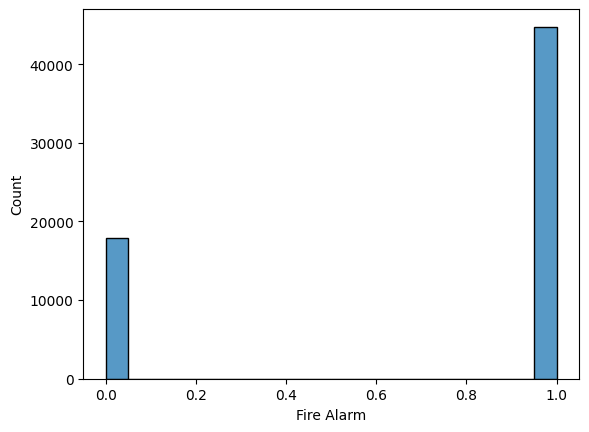

In [7]:
sns.histplot(data=df, x="Fire Alarm")

In [8]:
# Feature engineering

#Collinearity

In [9]:
#source: https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f

def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [10]:
calculate_vif(df=df, features=df.columns[1:13])

,VIF,Tolerance
Temperature[C],1.099795e+00,9.092602e-01
Humidity[%],3.257321e+00,3.070008e-01
TVOC[ppb],4.061493e+00,2.462149e-01
eCO2[ppm],2.711375e+00,3.688166e-01
Raw H2,3.012871e+00,3.319093e-01
Raw Ethanol,2.607301e+00,3.835383e-01
Pressure[hPa],2.709937e+00,3.690123e-01
PM1.0,9.726472e+10,1.028122e-11
PM2.5,4.599264e+11,2.174261e-12
NC0.5,7.351735e+10,1.360223e-11


The valid value for VIF ranges from 1 to infinity. A rule of thumb for interpreting VIF values is:

1 — features are not correlated

1<VIF<5 — features are moderately correlated

VIF>5 — features are highly correlated

VIF>10 — high correlation between features and is cause for concern

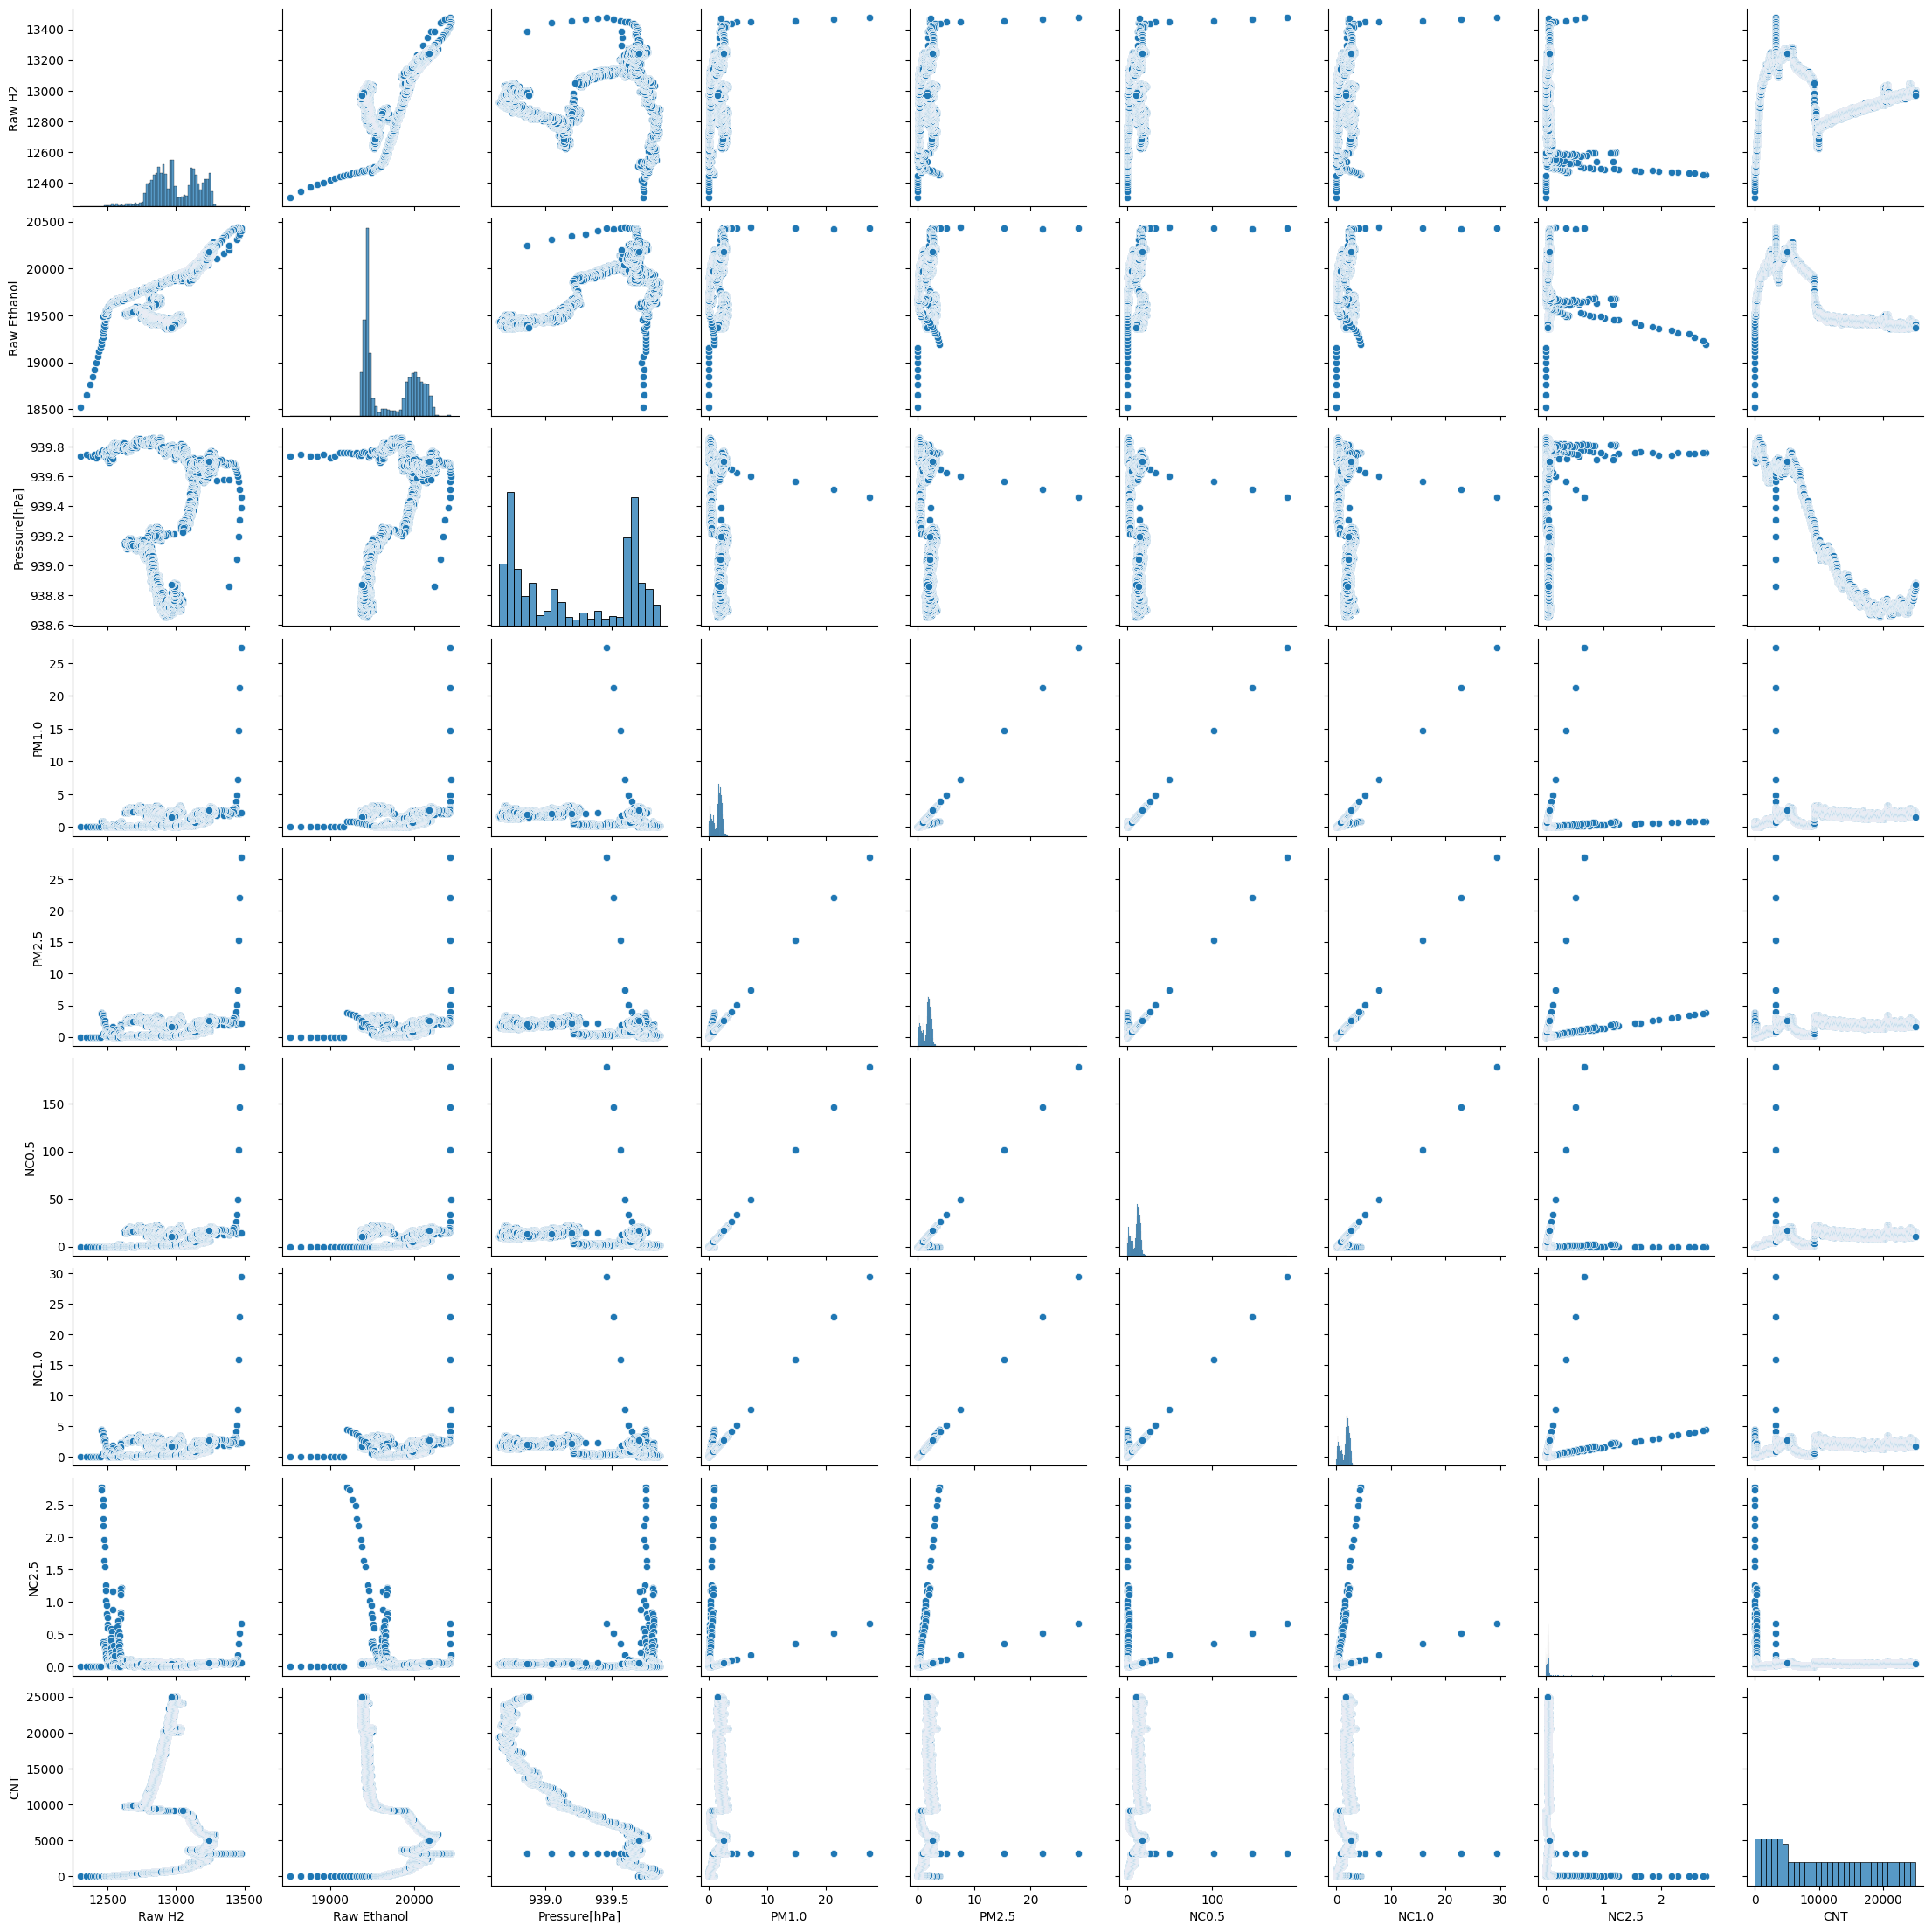

In [11]:
sns.pairplot(df.iloc[1:30000,5:14])

In [12]:
df.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [13]:
#dropping highly correlataed feature:
#df = df.drop(['CNT','UTC'], axis=1)
df = df.drop(['PM2.5', 'NC0.5', 'NC1.0', 'NC2.5','CNT','UTC'], axis=1)

In [25]:
# Training and Testing
X = df.drop(['Fire Alarm'], axis=1)
y = df['Fire Alarm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


0.9981638192559477


c:\Users\AX-St\.virtualenvs\AX-St-9yHjEswu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


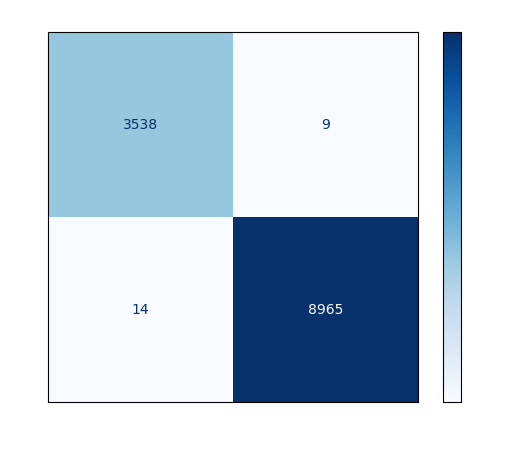

In [15]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))

from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

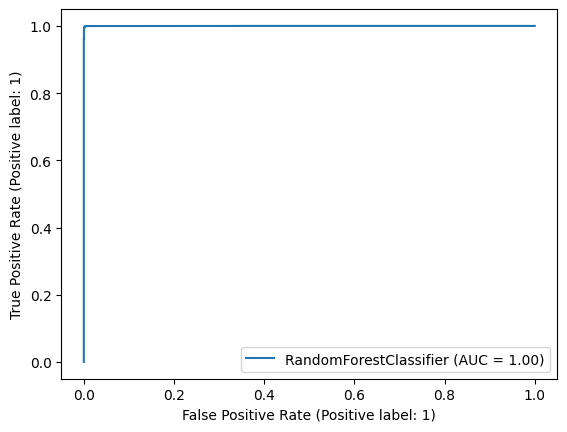

In [16]:
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [26]:
#pipeline
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self 

pipeline = make_pipeline(
columnDropperTransformer(['PM2.5', 'NC0.5', 'NC1.0', 'NC2.5','CNT','UTC']),
RandomForestClassifier(max_depth=5, random_state=0))


params = {"max_depth": 5}
    
pipeline.fit(X_train, y_train)
    
    # test
y_pred = pipeline.predict(X_test)

    # compute accuracy of the model
score = pipeline.score(X_test, y_test)
print(score)

0.9991218266006706


In [28]:
#Save model

# save the model to disk
filename = './prediction_service/initial_rf_pipe.sav'
#pickle.dump(pipeline, open(filename, 'wb'))
 
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model)
 #result = loaded_model.score(X_test, Y_test)
 #print(result)

Pipeline(steps=[('columndroppertransformer',
                 <__main__.columnDropperTransformer object at 0x00000267EEAC8160>),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, random_state=0))])
